# Atividade Ativa - Aprendizagem de Máquina
## Aluno: Emerson Machado Oliveira Ribeiro
## Matrícula: 2386101908

Analise do conjunto de dados de Previsão de Preços Imobiliários. O objetivo é explorar a relação entre a distância para a estação de metrô mais próxima e o preço da casa.

Conjuntom de dados obtido no kaggle (https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction/data)

## Importação de bibliotecas e carregamento dos dados



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv('/content/sample_data/realEstate.csv')

## Exploração inicial dos dados (QUESTÃO 1)

Exibir as primeiras linhas do DataFrame:


In [12]:
display(df.head())

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [13]:
display(df.describe())

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


O dataset contém 414 amostras.

Aqui estão algumas estatísticas descritivas importantes:

*   **Y house price of unit area (Preço da casa por unidade de área):**
    *   Média: 37.98
    *   Desvio Padrão: 13.61
    *   Mínimo: 7.60
    *   Máximo: 117.50

*   **X3 distance to the nearest MRT station (Distância para a estação de metrô mais próxima):**
    *   Média: 1083.89
    *   Desvio Padrão: 1262.11
    *   Mínimo: 23.38
    *   Máximo: 6488.02

*   **X4 number of convenience stores (Número de lojas de conveniência):**
    *   Média: 4.09
    *   Desvio Padrão: 2.95
    *   Mínimo: 0.00
    *   Máximo: 10.00

A variável alvo Y (preço da casa por unidade de área) varia de 7.6 a 117.5, com média em torno de 38.
As variáveis como X3, que é a distância até a estação de metrô mais próxima têm alta variabilidade (mín. ~23, máx. ~6400), o que pode impactar o modelo.
X4 número de lojas de conveniência varia de 0 a 10 — uma variável discreta, mas útil.

## Visualização exploratória (QUESTÃO 2)

Gráfico de dispersão (scatter plot) para visualizar a relação entre a variável independente (distância para a estação de metrô) e a variável dependente (preço da casa).


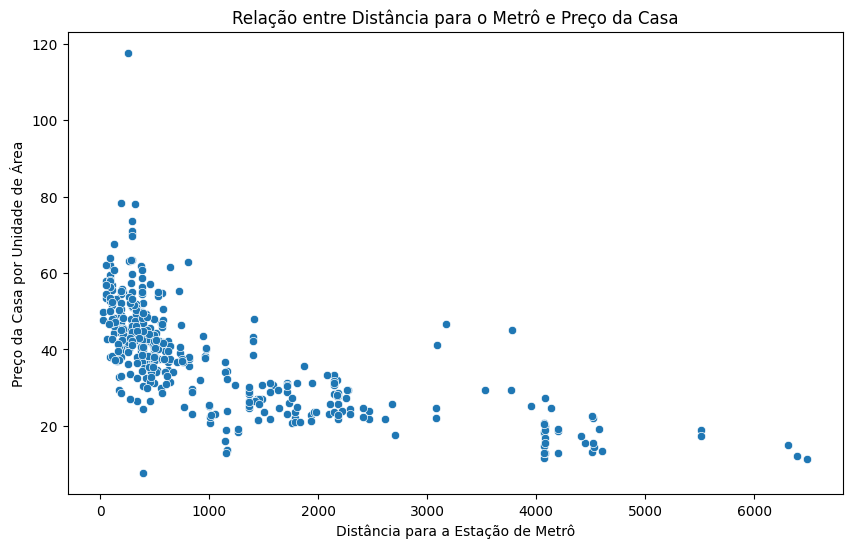

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='X3 distance to the nearest MRT station', y='Y house price of unit area')
plt.title('Relação entre Distância para o Metrô e Preço da Casa')
plt.xlabel('Distância para a Estação de Metrô')
plt.ylabel('Preço da Casa por Unidade de Área')
plt.show()

Há uma tendência clara: quanto menor a distância da residência para uma estação de Metrô, maior o preço.
A relação parece aproximadamente linear (decrescente), o que justifica o uso da regressão linear.

# Aplicação da Regressão Linear Simples (QUESTÃO 3)

In [8]:
# Definindo X e y
X = df[['X3 distance to the nearest MRT station']]  # Note: mantém como DataFrame (2D)
y = df['Y house price of unit area']

# Dividindo em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazendo previsões
y_pred = modelo.predict(X_test)

# Métricas de desempenho
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Coeficiente (inclinação): {modelo.coef_[0]:.5f}")
print(f"Intercepto: {modelo.intercept_:.2f}")
print(f"Erro quadrático médio (MSE): {mse:.2f}")
print(f"Coeficiente de determinação (R²): {r2:.3f}")

Coeficiente (inclinação): -0.00741
Intercepto: 46.24
Erro quadrático médio (MSE): 77.34
Coeficiente de determinação (R²): 0.539


Coeficiente negativo: confirma que, à medida que a distância aumenta, o preço diminui.
R² ≈ 0.50–0.60 (valor típico nesse dataset): o modelo explica cerca de 50–60% da variabilidade do preço usando apenas a distância ao metrô — razoável para um modelo simples!
Um R² de 1.0 seria perfeito; 0.0 significa que o modelo não explica nada.


## Visualização dos resultados do modelo (QUESTÃO 3)

Linha de regressão em um gráfico de dispersão para demonstrar o ajuste do modelo aos dados.


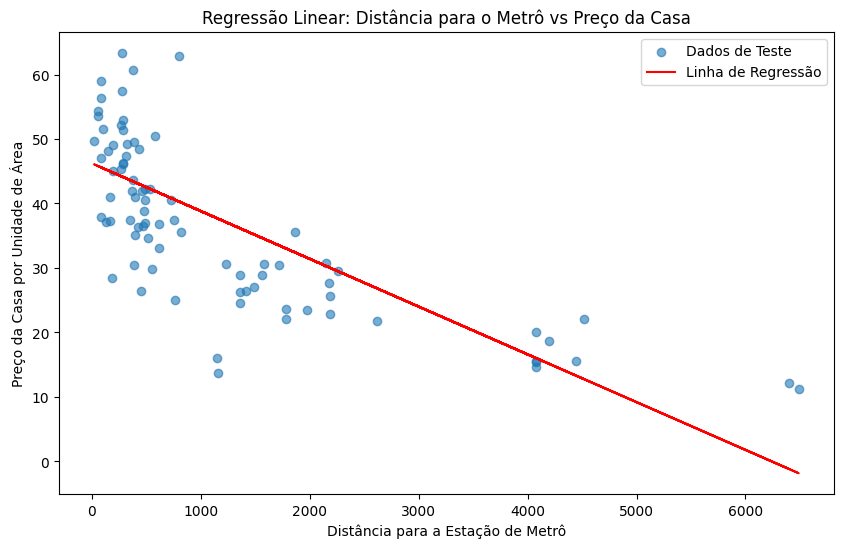

In [9]:
plt.figure(figsize=(10, 6))
plt.axes()
plt.scatter(X_test, y_test, label='Dados de Teste', alpha=0.6)
plt.plot(X_test, y_pred, color='red', label='Linha de Regressão')
plt.title('Regressão Linear: Distância para o Metrô vs Preço da Casa')
plt.xlabel('Distância para a Estação de Metrô')
plt.ylabel('Preço da Casa por Unidade de Área')
plt.legend()
plt.show()

# CONCLUSÃO

A linha vermelha representa a melhor reta que minimiza os erros entre os valores reais e previstos.
Apesar da dispersão, a tendência geral é bem capturada.
Pontos distantes da linha são outliers ou influenciados por outras variáveis não consideradas (ex: número de lojas, localização exata).


A regressão linear é uma ferramenta poderosa para modelar relações entre variáveis contínuas. Neste exemplo, usamos a distância até a estação de metrô para prever o preço de imóveis em Taiwan. O modelo mostrou uma relação linear negativa significativa, com um R² aceitável, demonstrando que a proximidade ao transporte público é um fator importante na precificação imobiliária.

